# TP3 - VANBELLE Julien

# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julienvanbelle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choix de la décennie

In [4]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['Bxl_1960_Tome_II1_Part_1.txt',
 'Bxl_1960_Tome_II1_Part_2.txt',
 'Bxl_1960_Tome_II1_Part_3.txt',
 'Bxl_1960_Tome_II1_Part_4.txt',
 'Bxl_1960_Tome_II1_Part_5.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'PUBLICATION\n\nPERIODIQUE\n\nVILLE DE BRUXELLES\n\nAnnée 1960\n\nBULLETIN\nCOMMUNAL\nTOME II "\n_u\n\nImpr. H . 6 M . S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1960\n\n\x0c\x0cN" 14\n\nCOMPTE\n\nR E N D U D E L A S E A N C E D U 1"\' A O U T\n\nVILLE\n\nDE\n\n1960\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication\n\npériodique)\n\nA n n é e 1960\n\nCONSEIL\n\nS é a n c e du\n\nPRESIDENCE\n\nCOMMUNAL\n\n1\n\ner\n\naoût\n\nDE M'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 1min 30s, sys: 502 ms, total: 1min 30s
Wall time: 1min 35s


In [12]:
# Détail de la matrice
tfidf_vectors

<420x6466 sparse matrix of type '<class 'numpy.float64'>'
	with 574279 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

+considérant    0.300647
fer             0.228639
curage          0.207466
dma             0.153796
art             0.147675
                  ...   
engagé          0.000000
engager         0.000000
engagements     0.000000
engage          0.000000
™               0.000000
Length: 6466, dtype: float64

### Nombre de clusters

In [14]:
N_CLUSTERS = 3

In [15]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Application du clustering à l'aide de la fonction `fit_predict`

In [16]:
clusters = km_model.fit_predict(tfidf_vectors)

In [17]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [18]:
pprint(dict(clustering))

{0: ['Bxl_1963_Tome_II1_Part_6.txt',
     'Bxl_1963_Tome_II1_Part_8.txt',
     'Bxl_1963_Tome_II1_Part_9.txt',
     'Bxl_1963_Tome_II2_Part_2.txt',
     'Bxl_1963_Tome_II2_Part_3.txt',
     'Bxl_1963_Tome_II2_Part_4.txt',
     'Bxl_1963_Tome_II2_Part_5.txt',
     'Bxl_1963_Tome_II2_Part_8.txt',
     'Bxl_1964_Tome_II1_Part_4.txt',
     'Bxl_1964_Tome_II1_Part_8.txt',
     'Bxl_1964_Tome_II1_Part_9.txt',
     'Bxl_1964_Tome_II2_Part_1.txt',
     'Bxl_1964_Tome_II2_Part_2.txt',
     'Bxl_1964_Tome_II2_Part_3.txt',
     'Bxl_1964_Tome_II2_Part_7.txt',
     'Bxl_1964_Tome_I_Part_11.txt',
     'Bxl_1965_Tome_II1_Part_1.txt',
     'Bxl_1965_Tome_II1_Part_2.txt',
     'Bxl_1965_Tome_II1_Part_3.txt',
     'Bxl_1965_Tome_II1_Part_5.txt',
     'Bxl_1965_Tome_II1_Part_7.txt',
     'Bxl_1965_Tome_II1_Part_9.txt',
     'Bxl_1965_Tome_II2_Part_1.txt',
     'Bxl_1965_Tome_II2_Part_10.txt',
     'Bxl_1965_Tome_II2_Part_11.txt',
     'Bxl_1965_Tome_II2_Part_12.txt',
     'Bxl_1965_Tome_II2_Part_2.txt',

## Visualiser les clusters

In [19]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [20]:
reduced_vectors[:10]

array([[-0.38270903, -0.30286674],
       [-0.46021261, -0.36440026],
       [-0.04160341,  0.07746178],
       [-0.42760888, -0.33991354],
       [-0.23794385, -0.10347365],
       [-0.10847704, -0.04634236],
       [-0.26295903, -0.1985568 ],
       [-0.3096517 , -0.15191622],
       [-0.08372557, -0.01569475],
       [-0.0927909 ,  0.02180157]])

### Générer le plot

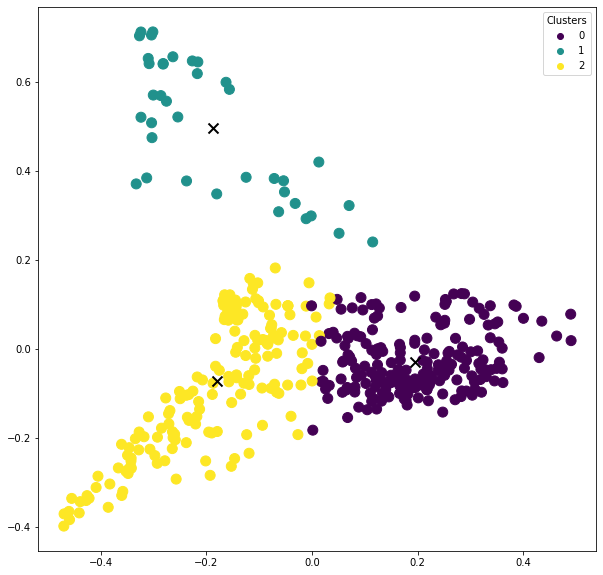

In [21]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embeddings : le modèle Word2Vec

In [2]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [3]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

In [5]:
print(sentences)

### Analyse des bigrams

In [24]:
bigram_phrases = Phrases(sentences)

In [25]:
type(bigram_phrases.vocab)

dict

In [26]:
len(bigram_phrases.vocab.keys())

5978799

In [27]:
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

absence_&


In [28]:
bigram_phrases.vocab[key_]

1

In [29]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

### Analyse des trigrams

In [30]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [31]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [32]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [33]:
print(corpus[:100])

[['v', 'i', 'l', 'l', 'e', 'de', 'bruxelles', 'bulletin', 'ires', '8eanas', 'dl', '!'], ['conseil_communal', 'annee', '1847', '.'], ['au', 'ville', 'de', 'b', 'r', 'u', 'x', 'e', 'l', 'l', 'e', 's', '.'], ['bulletin', 'conseil', 'aes', 'seances', 'communal', '.'], ['annee', '1847', '.'], ['bruxelles', ',', 'imprimerie', 'd', 'e', 'j', '.'], ['h', '.', 'b', 'r', 'i', 'a', 'r', 'd', ',', 'rite', 'n', 'e', 'u', 'v', 'e', ',', '3', '1', ',', 'faubourg', 'de', 'n', 'a', 'm', 'u', 'r', ',', '1', '84', '8', 'de', '!'], ['du', 'consei', 'dibi', 'e', '.', '-', 'communication', 'conclusions', 'de', 'la', 'section', 'des', 'du', 'nouvel_hospice', 'pour', 'les', 'av', 'enraisonde', 'l', "'", 'absence', '&', 'maladie', '.', 'le', 'conseil', 'ajourne', 'leurs', 'de', 'pierre', 'el', 'marchai', 'cles', 'des', 'taxes', 'communale', "'", 'bieniaance', 'eldeseianv', 'il', 'est', 'donne', 'communie', ';', 'mandant', 'le', 'o', 'p', 'fa', 'gnant', 'l', "'", 'envoi', 'de', 'leur', 'bn', 'par', 'l', "'", 'e

### Entrainement de Word2Vec

In [46]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=6, # La taille du "contexte", ici 6 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 10 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 15min 31s, sys: 1min 42s, total: 17min 14s
Wall time: 9min 25s


### Sauvegarde du modèle généré par Word2Vec

In [47]:
outfile = f"../data/bulletins.model"
model.save(outfile)

### Chargement du modèle

In [48]:
model = Word2Vec.load("../data/bulletins.model")

## Exploration du modèle

### Similarity(3)

In [49]:
model.wv.similarity("etablissement", "hopital")

0.707169

In [50]:
model.wv.similarity("rue", "boulevard")

0.700963

In [51]:
model.wv.similarity("depenses", "francs")

0.4348825

### Most Similar (3)

In [52]:
model.wv.most_similar("bourgemestre", topn=10)

[('bourmestre', 0.9241952896118164),
 ('conseiller_vandergeten', 0.8540228605270386),
 ('sieur_goetvinck', 0.853388786315918),
 ('bougmestre', 0.8516767621040344),
 ('pechevin_lefevre', 0.8469296097755432),
 ('conseiller_brandenburg', 0.8443721532821655),
 ('op_uitnodiging', 0.8432469964027405),
 ('jules_van_volxem', 0.8428296446800232),
 ('aangifte_op_vermelde_datum', 0.8423205018043518),
 ('conseiller_vanderlinden', 0.8406500220298767)]

In [53]:
model.wv.most_similar("depenses", topn=10)

[('recettes', 0.9633265137672424),
 ('previsions', 0.9221402406692505),
 ('depenses_facultatives', 0.9046937227249146),
 ('credits', 0.8850541710853577),
 ('recettes_extraordinaires', 0.8834420442581177),
 ('recettes_ordinaires', 0.8830805420875549),
 ('depenses_extraordinaires', 0.8819311261177063),
 ('receltes', 0.8784440159797668),
 ('depenses_ordinaires', 0.872888445854187),
 ('exercices_anterieurs', 0.8555951118469238)]

In [54]:
model.wv.most_similar("travaux", topn=10)

[('travaux_urgents', 0.8560998439788818),
 ('grands_travaux', 0.8366211652755737),
 ('iravaux', 0.821448564529419),
 ('travaux_complementaires', 0.8169556260108948),
 ('installations_electriques', 0.8151019811630249),
 ('installations', 0.8117236495018005),
 ('toitures', 0.8107927441596985),
 ('travaux_interieurs', 0.809475302696228),
 ('locaux', 0.8057436943054199),
 ('revetements_speciaux', 0.803111732006073)]

In [55]:
print(model.wv.most_similar(positive=['travail', 'communal'], negative=['rue']))

[('controle', 0.7353988885879517), ('personnel_ouvrier', 0.7331334948539734), ('calcul', 0.7293558716773987), ('rappel', 0.6989557147026062), ('chomage', 0.6866339445114136), ('contribuable', 0.6707057952880859), ('cumul', 0.6563355326652527), ('surcroit', 0.6536252498626709), ('recrutement', 0.6510536074638367), ('service_social', 0.6506235599517822)]


In [56]:
print(model.wv.most_similar(positive=['travaux', 'communal'], negative=['rue', 'voirie']))

[('elements_complets', 0.5970019102096558), ('suit_:_primes', 0.5621328949928284), ('justifie_cette', 0.5341380834579468), ('chaque_annee', 0.5270583629608154), ('conges', 0.5134211182594299), ('sera_doublee', 0.49888867139816284), ('chaque_trimestre', 0.4973134398460388), ('chiffres_suivants', 0.4936138689517975), ('sommes_percues', 0.4907114505767822), ('ayant_pris', 0.48980629444122314)]


In [57]:
print(model.wv.most_similar(positive=['payement'], negative=['echevin','bourgemestre','citoyen']))

[('restants', 0.6669670939445496), ('excedants', 0.6582974195480347), ('der_stadseigendommen', 0.6490575671195984), ('annuels', 0.6381696462631226), ('sont_evalues', 0.6333494186401367), ('bonis', 0.6281870007514954), ('travaux_imprevus', 0.6273893713951111), ('disponibles', 0.6209419965744019), ('totales', 0.6187775731086731), ('concessions_temporaires', 0.614159882068634)]
